In [113]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from numpy.random import normal
import math
import pandas as pd
%matplotlib inline

In [74]:
lr = LinearRegression()

In [75]:
br = BaggingRegressor(base_estimator=lr)

In [76]:
boston = load_boston()['data']

In [77]:
boston[:5]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

In [78]:
ss = StandardScaler()

In [79]:
boston_norm = ss.fit_transform(boston)

In [80]:
prices = load_boston()['target']

In [81]:
br.fit(boston_norm, prices)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [82]:
br.estimators_

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)]

In [83]:
br.estimators_samples_

[array([ True, False,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
        False, False, False,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True, False,  True, False,
         True,  True,  True, False, False,  True,  True,  True, False,
        False,  True, False, False,  True,  True,  True, False,  True,
        False,  True, False,  True,  True,  True, False,  True,  True,
         True,  True, False, False,  True,  True,  True, False,  True,
         True,  True, False, False,  True,  True,  True,  True, False,
         True,  True, False, False,  True, False,  True,  True,  True,
         True,  True,  True,  True, False, False, False,  True, False,
         True,  True,  True, False,  True,  True, False, False,  True,
         True, False,  True,  True, False,  True, False, False,  True,
        False,  True, False,  True, False,  True,  True,  True, False,
      

In [84]:
br.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])]

In [94]:
results = [[] for i in range(feature_sample.shape[1])]

for sample_idx in range(len(br.estimators_)):
    mdl = br.estimators_[sample_idx]
    feature_sample = boston_norm[br.estimators_samples_[sample_idx], :]
    output_sample = prices[br.estimators_samples_[sample_idx]] 
    
    feature_sample_perturb = feature_sample.copy()
     
    for i in range(feature_sample_perturb.shape[1]):
        
        gaussian_noise = normal(size=feature_sample_perturb.shape[0])
        
        feature_sample_perturb[:, i] = feature_sample[:, i] + gaussian_noise
        
        old_score = mdl.score(feature_sample, output_sample)
        new_score = mdl.score(feature_sample_perturb, output_sample)
        
        diff = new_score - old_score
        
        results[i].append(diff)

In [95]:
feature_sample_perturb.shape

(320, 13)

In [122]:
scores = [np.mean(i) for i in results]

In [125]:
norm_scores = [i/np.max(np.absolute(scores)) for i in scores]

In [126]:
norm_scores

[-0.014934588249654929,
 -0.034435254292372555,
 -0.03818302456189003,
 -0.049455036983597288,
 -0.12162284278978658,
 -0.25286052131837794,
 -0.25475365544112705,
 -0.42093809265734367,
 -0.55403218062114656,
 -0.6443279018164445,
 -0.73082810516102414,
 -0.75232849006124314,
 -1.0]

In [127]:
norm_scores_series = pd.Series(norm_scores)

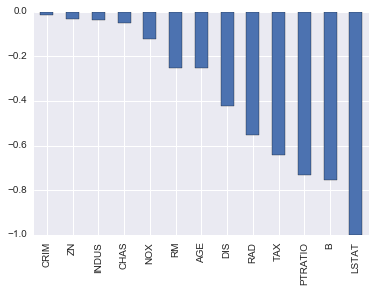

In [128]:
ax = norm_scores_series.plot(kind='bar')
ax.set_xticklabels(load_boston()['feature_names'])